<a href="https://colab.research.google.com/github/annisharafi/MachineLearning/blob/master/Convolutional%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementasi CNN pada MNIST Database ( large database of handwritten digits )**

In [0]:
#mnist dataset import

import keras
from keras.datasets import mnist
#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<Figure size 576x396 with 0 Axes>

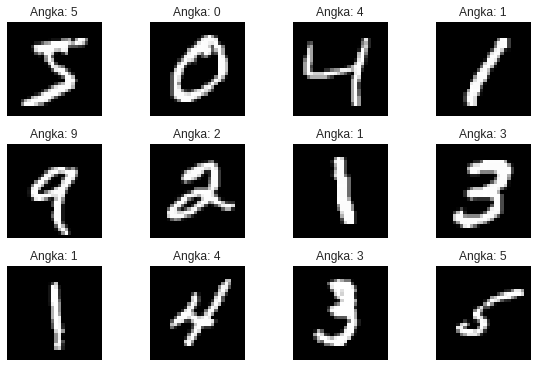

<Figure size 576x396 with 0 Axes>

In [134]:
#showing example of dataset
import matplotlib.pyplot as plt
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Angka: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.figure()

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import History


#normalize input data for keras processing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#typecast into decimal
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

In [136]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
#model building
model = Sequential()

#convolutional layer using Rectified Linear 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))

#choose the best feature using pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten dimensions
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))

#output a softmax
model.add(Dense(10,activation=tf.nn.softmax))

In [138]:
epoch=10
history = History()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
train_log = model.fit(x=x_train,y=y_train, epochs=epoch,callbacks=[history])

Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2223 - acc: 0.9331
Epoch 2/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.0892 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0610 - acc: 0.9813
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0486 - acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0383 - acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0330 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0261 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0226 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0207 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 11s 190us/step - loss: 

In [143]:
train_log.history

{'acc': [0.9330833333333334,
  0.97275,
  0.9812666666666666,
  0.9844833333333334,
  0.9867833333333333,
  0.9887,
  0.9914,
  0.9923833333333333,
  0.9929666666666667,
  0.9938166666666667],
 'loss': [0.22227636054133376,
  0.08918300942567488,
  0.061023080582218246,
  0.04859178555961698,
  0.038299691250446875,
  0.03296585228590993,
  0.02613253083970873,
  0.02262564745107399,
  0.02072385875361603,
  0.017090094521760572]}

In [144]:
#menghitung akurasi dan loss data validation
valid_log = model.evaluate(x_test, y_test)
valid_log

10000/10000 [==============================] - 1s 69us/step


[0.05346816610185706, 0.9865]

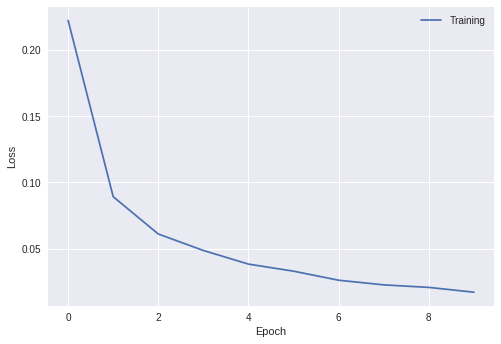

In [145]:
# plotting the metrics
plt.plot(train_log.history['loss'],label='Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


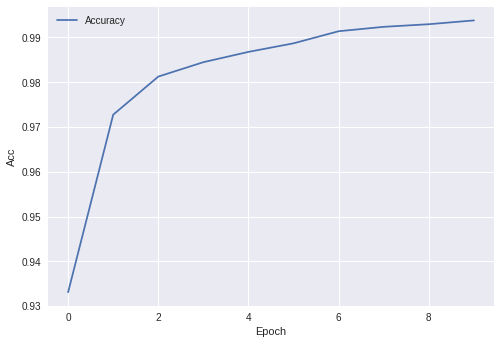

In [148]:
# plotting the metrics
plt.plot(train_log.history['acc'],label='Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()
